In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
 
from ipywidgets import interact
from scipy.integrate import odeint, solve_ivp
from matplotlib import cm

<hr style="border:2px solid black"> </hr>

The potential function for:



* Source of strength $q$ at $r_{source}$ : $$ \phi(r, \theta) = \frac{q}{2\pi}\ln(|\vec{r} - \vec{r}_{source}|)$$



$$ \phi(x, y) = \frac{q}{2\pi}\ln(\sqrt{(x - x_{source})^2 + (y - y_{source})^2}) $$



* Sink of strength $-q$ at $r_{sink}$ : $$\phi(r, \theta) = \frac{-q}{2\pi}\ln(|\vec{r} - \vec{r}_{sink}|)$$



$$ \phi(x, y) = \frac{-q}{2\pi}\ln(\sqrt{(x - x_{sink})^2 + (y - y_{sink})^2}) $$



* Doublet of strength $\mu$ at (0, 0) with horizontal orientation [Source (q) at ($-\epsilon/2, 0)$, Sink (-q) at $(\epsilon/2, 0)$ and $q\epsilon = \mu$]: 



$$\phi(r, \theta) = \frac{\mu{\cos\theta}}{2\pi{r}} $$



$$\phi(x, y) = \frac{\mu{x}}{2\pi{(x^2 + y^2)}} $$



The velocity distribution for (Determined by gradient of potential function) :



* Source of strength $q$ at $r_{source}$ : $$ u_r = \frac{q}{2\pi|\vec{r} - \vec{r}_{source}|}, \ \ \ u_\theta = 0 $$



$$ u_x = \frac{q}{2\pi}\frac{(x - x_{source})}{(x - x_{source})^2 + (y - y_{source})^2}, \ \ \ u_y = \frac{q}{2\pi}\frac{(y - y_{source})}{(x - x_{source})^2 + (y - y_{source})^2}$$



* Sink of strength $-q$ at $r_{sink}$ : $$ u_r = \frac{-q}{2\pi|\vec{r} - \vec{r}_{sink}|}, \ \ \ u_\theta = 0 $$



$$ u_x = \frac{-q}{2\pi}\frac{(x - x_{sink})}{(x - x_{sink})^2 + (y - y_{sink})^2}, \ \ \ u_y = \frac{-q}{2\pi}\frac{(y - y_{sink})}{(x - x_{sink})^2 + (y - y_{sink})^2}$$



* Doublet of strength $\mu$ at (0, 0) with horizontal orientation [Source (q) at ($-\epsilon/2, 0)$, Sink (-q) at $(\epsilon/2, 0)$ and $q\epsilon = \mu$]: 



$$ u_x = \frac{\mu}{2\pi}\frac{y^2 - x^2}{(x^2 + y^2)^2}, \ \ \ u_y = \frac{\mu}{2\pi}\frac{-2xy}{(x^2 + y^2)^2}$$

<hr style="border:2px solid black"> </hr>

Complex analysis of flow $(z = x+jy)$:

Complex Potential = $\Phi(z)$



1. Source / Sink at $(x_0, y_0)$:

    * Complex Potential : $$ \Phi(z) =  \frac{q}{2\pi}\ln{(z - z_0)}$$
    
    
2. Free Stream in x - direction:
    
    * Complex Potential : $$ \Phi(z) = u_\infty z $$

3. Doublet at (0, 0):

    * Complex Potential : $$ \Phi(z) = \frac{\mu}{2\pi z} $$

<hr style="border:2px solid black"> </hr>

A source, of unit strength, is placed at (-0.5, 0) and a sink, of unit strength, is placed at (0.5, 0)

$$ \phi = \frac{1}{2\pi}\ln \bigg[ \frac{(x + 0.5)^2 + y^2}{(x - 0.5)^2 + y^2} \bigg] $$


$$ u_x = \frac{1}{2\pi} \bigg[\frac{(x + 0.5)}{(x + 0.5)^2 + y^2} - \frac{(x - 0.5)}{(x - 0.5)^2 + y^2} \bigg],  \ \ u_y = \frac{1}{2\pi} \bigg[\frac{y}{(x + 0.5)^2 + y^2} - \frac{y}{(x - 0.5)^2 + y^2} \bigg]$$

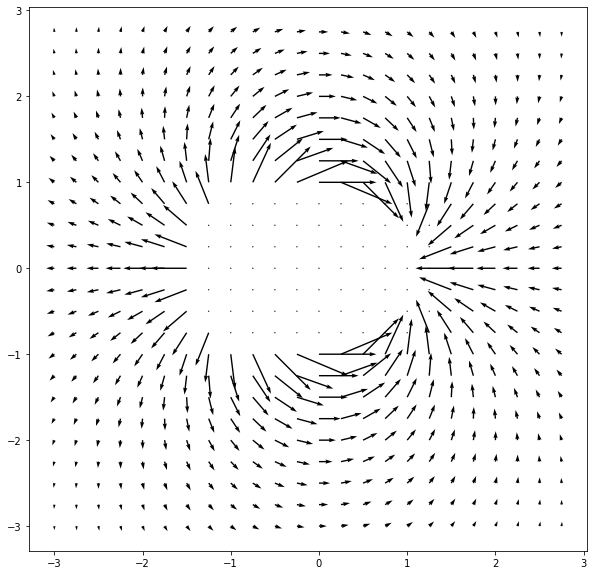

In [2]:
# Quiver Plot:
r = np.meshgrid(np.arange(-3, 3, 0.25), np.arange(-3, 3, 0.25))
x, y = r
u, v = np.zeros_like(r)
for i in range(len(x)):
    for j in range(len(x[0])):
        if (((x[i][j] - 0.5)**2 + y[i][j]**2 >= 1) and ((x[i][j] + 0.5)**2 + y[i][j]**2 >= 1)):
            u[i][j] = ((x[i][j] + 0.5)/(2*np.pi*((x[i][j] + 0.5)**2 + (y[i][j])**2))) - ((x[i][j] - 0.5)/(2*np.pi*((x[i][j] - 0.5)**2 + (y[i][j])**2)))
            v[i][j] = ((y[i][j])/(2*np.pi*((x[i][j] + 0.5)**2 + (y[i][j])**2))) - ((y[i][j])/(2*np.pi*((x[i][j] - 0.5)**2 + (y[i][j])**2)))
        else:
            u[i][j] = 0
            v[i][j] = 0
plt.figure(figsize = (10, 10))
plt.quiver(x, y, u, v);

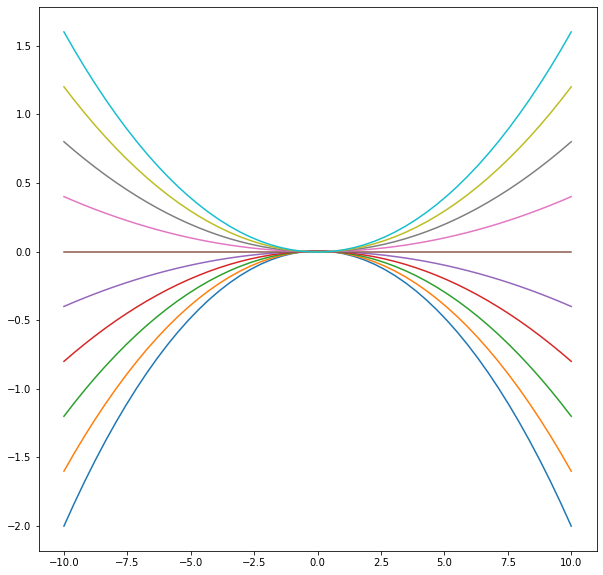

In [3]:
# Streamlines plotted using integration method:
def dydx1(y, x):
    u = (x + 0.5)/((x + 0.5)**2 + y**2) - (x - 0.5)/((x - 0.5)**2 + y**2)
    v = y/((x + 0.5)**2 + y**2) - y/((x - 0.5)**2 + y**2)
    dif = v/u
    return dif

ic1 = -2
plt.figure(figsize = (10, 10))
for i in range(10):
    sol = odeint(dydx1, ic1+i*0.4, np.linspace(-10, 10, 50))
    plt.plot(np.linspace(-10, 10, 50), sol)

In [4]:
# Potential Lines and Streamlines [Using complex potential]:
def potential_stream_plot(Plot):
    
    x, y = np.mgrid[-3:3:50j, -3:3:50j]
    z = x + 1j*y
    Phi = (1/(2*np.pi))*np.log((z + 0.5)/(z - 0.5))
    
    if Plot == 'Streamlines':
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.imag, 50, cmap = cm.plasma)
    
    elif Plot == 'Potential Lines':
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.real, 50)
    
    elif Plot == 'Potential Lines + Streamlines':
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.real, 50)
        plt.contour(x, y, Phi.imag, 50, cmap = cm.plasma)

interact(potential_stream_plot, Plot = ['Streamlines', 'Potential Lines', 'Potential Lines + Streamlines']);

interactive(children=(Dropdown(description='Plot', options=('Streamlines', 'Potential Lines', 'Potential Lines…

<hr style="border:2px solid black"> </hr>

Adding a free stream of strength $u_\infty$ to give:


$$ \phi = \frac{q_{source}}{2\pi}\ln \big[ {(x + 0.5)^2 + y^2}\big] + \frac{q_{sink}}{2\pi}\ln \big[{(x - 0.5)^2 + y^2} \big] + u_\infty x$$


$$ u_x = \frac{1}{2\pi} \bigg[\frac{q_{source}(x + 0.5)}{(x + 0.5)^2 + y^2} + \frac{q_{sink}(x - 0.5)}{(x - 0.5)^2 + y^2} \bigg] + u_\infty,  \ \ u_y = \frac{1}{2\pi} \bigg[\frac{q_{source}y}{(x + 0.5)^2 + y^2} + \frac{q_{sink}y}{(x - 0.5)^2 + y^2} \bigg]$$

In [5]:
def all_freestream_plots(q_source, q_sink, u_inf, Plot):
    
    if Plot == 'Potential Lines':
        x, y = np.mgrid[-3:3:50j, -3:3:50j]
        z = x + 1j*y
        Phi = (q_source/(2*np.pi))*np.log(z + 0.5) + (q_sink/(2*np.pi))*np.log(z - 0.5) + (u_inf)*z
        
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.real, 50)
    
    elif Plot == 'Steamlines inside and outside the solid object (Red Contour)':
        x, y = np.mgrid[-3:3:50j, -3:3:50j]
        z = x + 1j*y
        Phi = (q_source/(2*np.pi))*np.log(z + 0.5) + (q_sink/(2*np.pi))*np.log(z - 0.5) + (u_inf)*z
        
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.imag, 50)
        plt.contour(x, y, Phi.imag, [0], colors = 'Red')
        
    
    elif Plot == 'Pressure Field':
        p_inf = 1
        x, y = np.mgrid[-3:3:50j, -3:3:50j]
        
        p = p_inf - 0.5*(((1/(2*np.pi))*(((q_source*(x + 0.5))/((x + 0.5)**2 + (y)**2)) + ((q_sink*(x - 0.5))/((x - 0.5)**2 + (y)**2))) + u_inf)**2 + (((1/(2*np.pi))*(((q_source*(y))/((x + 0.5)**2 + (y)**2)) + ((q_sink*(y))/((x - 0.5)**2 + (y)**2))))**2))
        
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, p, levels = 100)
    
    elif Plot == 'Iso Velocity Plot':
        x, y = x, y = np.mgrid[-1:1:50j, -1:1:50j]
        
        v = np.sqrt(((1/(2*np.pi))*(((q_source*(x + 0.5))/((x + 0.5)**2 + (y)**2)) + ((q_sink*(x - 0.5))/((x - 0.5)**2 + (y)**2))) + u_inf)**2 + (((1/(2*np.pi))*(((q_source*(y))/((x + 0.5)**2 + (y)**2)) + ((q_sink*(y))/((x - 0.5)**2 + (y)**2))))**2))
        
        fig, ax = plt.subplots(figsize = (10, 10))
        
        CS = ax.contour(x, y, v, levels = 50)
        ax.clabel(CS, inline=True, fontsize=10)

interact(all_freestream_plots, q_source = (0, 2, 0.5), q_sink = (-2, 0, 0.5), u_inf = (0, 2, 0.5), Plot = ['Potential Lines', 'Steamlines inside and outside the solid object (Red Contour)', 'Pressure Field', 'Iso Velocity Plot']);

interactive(children=(FloatSlider(value=1.0, description='q_source', max=2.0, step=0.5), FloatSlider(value=-1.…

<hr style="border:2px solid black"> </hr>

Replacing the source-sink pair with a doublet of strength $\mu$ :

$$ \phi = \frac{\mu{x}}{2\pi{(x^2 + y^2)}} + u_\infty x$$


$$u_x = \frac{\mu}{2\pi}\frac{y^2 - x^2}{(x^2 + y^2)^2} + u_\infty, \ \ \ u_y = \frac{\mu}{2\pi}\frac{-2xy}{(x^2 + y^2)^2}$$

In [6]:
def all_doublet_plots(mu, u_inf, Plot):
    if Plot == 'Potential Lines':
        x, y = np.mgrid[-3:3:50j, -3:3:50j]
        z = x + 1j*y
        Phi = mu/(2*np.pi*z) + (u_inf)*z
        
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.real, 50)
    
    elif Plot == 'Streamlines':
        x, y = np.mgrid[-3:3:50j, -3:3:50j]
        z = x + 1j*y
        Phi = mu/(2*np.pi*z) + (u_inf)*z
        
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, Phi.imag, 50)
        plt.contour(x, y, Phi.imag, [0], colors = 'Red')
    
    elif Plot == 'Pressure Field':
        p_inf = 1
        x, y = np.mgrid[-3:3:50j, -3:3:50j]
        
        p = p_inf - 0.5*((u_inf + ((mu*(y**2 - x**2))/(2*np.pi)*((x**2 + y**2)**2)))**2 + ((mu*x*y)/(np.pi)*((x**2 + y**2)**2))**2) 
        
        plt.figure(figsize = (10, 10))
        plt.contour(x, y, p, levels = 100)
    
    elif Plot == 'Iso Velocity Plot':
        x, y = x, y = np.mgrid[-1:1:50j, -1:1:50j]
        
        v = np.sqrt((u_inf + ((mu*(y**2 - x**2))/(2*np.pi)*((x**2 + y**2)**2)))**2 + ((mu*x*y)/(np.pi)*((x**2 + y**2)**2))**2) 
         
        
        fig, ax = plt.subplots(figsize = (10, 10))
        
        CS = ax.contour(x, y, v, levels = 50)
        ax.clabel(CS, inline=True, fontsize=10)

interact(all_doublet_plots, mu = (0, 2, 0.5), u_inf = (0, 2, 0.5), Plot = ['Potential Lines', 'Streamlines', 'Pressure Field', 'Iso Velocity Plot']);

interactive(children=(FloatSlider(value=1.0, description='mu', max=2.0, step=0.5), FloatSlider(value=1.0, desc…

The Iso Velocity plot for the Doublet and free stream combination is significantly different from the previous plot as near the center the velocity vanishes and hence there are no contours visible.

The pressure field plot is also significantly different as again at the center the velocity is zero.

The streamlines and potentail lines plots are similar but in the doublet case we get more defined and circular shape of the apparent solid object as compared to the previous case.